<a href="https://colab.research.google.com/github/EnesCaliskan/ImageToTextCNN/blob/main/TextToImageExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torchvision import models
from torchsummary import summary

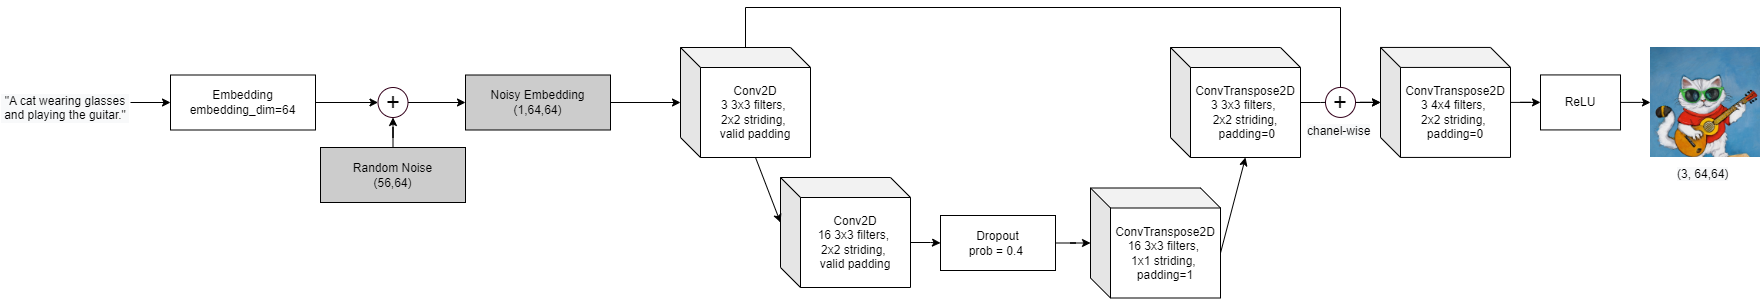

In [2]:
text = "A cat wearing glasses and playing the guitar"

# Simple preprocessing the text
word_to_ix = {"A": 0, "cat": 1, "wearing": 2, "glasses": 3, "and": 4, "playing": 5, "the": 6, "guitar":7}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long) # a tensor representing words by integers

vocab_size = len(lookup_tensor)

In [46]:
class TextToImage(nn.Module):
    def __init__(self, vocab_size):
        super(TextToImage, self).__init__()

        self.vocab_size = vocab_size
        self.noise = torch.rand((56,64))

        #DEFINE the layers

        self.embed = nn.Embedding(num_embeddings= self.vocab_size, embedding_dim= 64)
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size =(3,3), stride = (2,2), padding = 'valid')
        self.conv2 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (3,3), stride = (2,2), padding = 'valid')
        self.dropout = nn.Dropout(p=0.4)
        self.convTrans1 = nn.ConvTranspose2d(in_channels = 16, out_channels = 16, kernel_size = (3,3), stride = (1,1), padding = 1)
        self.convTrans2 = nn.ConvTranspose2d(in_channels = 16, out_channels = 3, kernel_size = (3,3), stride = (2,2), padding = 0)
        self.convTrans3 = nn.ConvTranspose2d(in_channels = 6, out_channels = 3, kernel_size = (4,4), stride = (2,2), padding = 0)

        self.relu = nn.ReLU()

    def forward(self, text_tensor):
        #SEND the input text tensor to the embedding layer

        text_out = self.embed(text_tensor)
        print('text_out' , text_out.shape)

        #COMBINE the embedding with the noise tensor. Make it have 3 dimensions

        combined = torch.cat((text_out, self.noise), dim=0)
        newdim = combined[None, :]
        print('newdim: ', newdim)

        #SEND the noisy embedding to the convolutional and transposed convolutional layers

        conv1_out = self.conv1(newdim)
        print('conv1_out', conv1_out.shape)

        conv2_out = self.conv2(conv1_out)
        print('conv2_out', conv2_out.shape)

        drop_out = self.dropout(conv2_out)
        print('drop_out', drop_out.shape)

        convTrans1_out = self.convTrans1(drop_out)
        print('convTrans1_out', convTrans1_out.shape)

        convTrans2_out = self.convTrans2(convTrans1_out)
        print('convTrans2_out', convTrans2_out.shape)

        combined1 = torch.cat((conv1_out, convTrans2_out), dim=0)
        print('combined1', combined1.shape)

        convTrans3_out = self.convTrans3(combined1)
        print('convTrans3_out', convTrans3_out.shape)

        relu_out = self.relu(convTrans3_out)
        print('relu_out', relu_out.shape)


        #SEND the combined outputs to the final layer. Please name your final output variable as "image" so you that it can be returned


        return relu_out #don't forget to name your last output as image, or just change the name here

In [47]:
texttoimage = TextToImage(vocab_size=vocab_size)

output = texttoimage(lookup_tensor)

output.size()

text_out torch.Size([8, 64])
newdim:  tensor([[[ 0.8477,  1.5114,  0.0526,  ...,  0.2082, -1.4897, -0.1532],
         [ 0.3832, -1.1985,  0.3084,  ..., -0.4719, -0.1203,  2.0208],
         [-1.0254,  0.6351,  0.0200,  ..., -0.2229,  0.1386,  0.6882],
         ...,
         [ 0.5255,  0.1844,  0.2608,  ...,  0.8748,  0.2927,  0.4142],
         [ 0.4291,  0.5857,  0.2519,  ...,  0.9792,  0.7769,  0.8431],
         [ 0.3656,  0.5854,  0.3977,  ...,  0.0089,  0.9304,  0.4098]]],
       grad_fn=<SliceBackward0>)
conv1_out torch.Size([3, 31, 31])
conv2_out torch.Size([16, 15, 15])
drop_out torch.Size([16, 15, 15])
convTrans1_out torch.Size([16, 15, 15])
convTrans2_out torch.Size([3, 31, 31])
combined1 torch.Size([6, 31, 31])
convTrans3_out torch.Size([3, 64, 64])
relu_out torch.Size([3, 64, 64])


torch.Size([3, 64, 64])

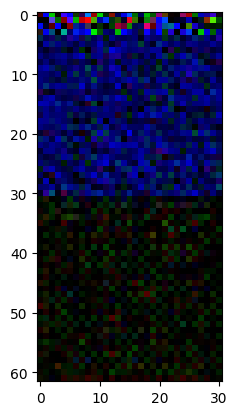

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.moveaxis(output.detach().numpy(), 0,-1))